In [1]:
import powerplantmatching as pm
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pm.powerplants(stored=False, update_all=True)
# pm.powerplants().head()

INFO:powerplantmatching.collection:Collect combined dataset for CARMA, GPD
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'CARMA'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'CARMA'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'GPD'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'GPD'.
INFO:powerplantmatching.matching:Comparing CARMA with GPD
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'CARMA'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'CARMA'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'GPD'.
INFO:powerplantmatching.cleaning:Not using saved aggregation groups for dataset 'GPD'.


Matched Data,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,DateIn,DateRetrofit,DateMothball,DateOut,lat,lon,EIC,projectID
0,Biopio,Oil,None,PP,AO,22.8,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-12.4706,13.7319,[nan],"{'GPD': ['WRI1023002'], 'CARMA': ['CARMA4687']}"
1,Thyna,Natural Gas,None,PP,TN,375.0,NaN,0.0,0.0,0.0,0.0,2004.0,NaN,NaN,NaN,34.6868,10.6424,[nan],"{'GPD': ['WRI1023607'], 'CARMA': ['CARMA45354']}"
2,Sennar,Hydro,None,PP,SD,15.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,13.5667,33.6333,[nan],"{'GPD': ['WRI1023184'], 'CARMA': ['CARMA40560']}"
3,Port sudan,Oil,None,PP,SD,38.1,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,19.6158,37.2164,[nan],"{'GPD': ['WRI1023181'], 'CARMA': ['CARMA35406'..."
4,Bel air,Oil,None,PP,SN,98.6,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,14.7170,-17.4780,[nan],"{'GPD': ['WRI1023157'], 'CARMA': ['CARMA3864',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,West coast,Wind,NaN,NaN,ZA,94.0,NaN,0.0,0.0,0.0,0.0,2015.0,NaN,NaN,NaN,-32.8340,18.0061,[nan],{'GPD': ['WRI1026023']}
1482,White nile state,Bioenergy,NaN,NaN,SD,100.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,14.0724,32.4672,[nan],{'GPD': ['WRI1023185']}
1483,Witkop,Solar,NaN,NaN,ZA,30.0,NaN,0.0,0.0,0.0,0.0,2014.0,NaN,NaN,NaN,-24.0420,29.3685,[nan],{'GPD': ['WRI1026062']}
1484,Zouerate,Solar,NaN,NaN,MR,3.0,NaN,0.0,0.0,0.0,0.0,2018.0,NaN,NaN,NaN,22.7241,-12.4578,[nan],{'GPD': ['WRI1063723']}


In [3]:
pm.powerplants().Country.unique()

array(['AO', 'TN', 'SD', 'SN', 'SL', 'SZ', 'TG', 'NE', 'MU', 'MW', 'RW',
       'TZ', 'ZA', 'ZM', 'UG', 'GA', 'CM', 'CG', 'CV', 'DJ', 'DZ', 'EG',
       'ER', 'ET', 'BJ', 'BI', 'BF', 'BW', 'CF', 'GH', 'MG', 'MR', 'MA',
       'GM', 'GN', 'GW', 'GQ', 'KE', 'LY', 'LS', 'NG', 'TD', 'CI', 'CD',
       'MZ', 'SH', 'SC', 'ML', 'KM', 'ZW', 'SO', 'RE', 'LR', 'ST', nan],
      dtype=object)

<AxesSubplot:title={'center':'CARMA'}, xlabel='lon', ylabel='lat'>

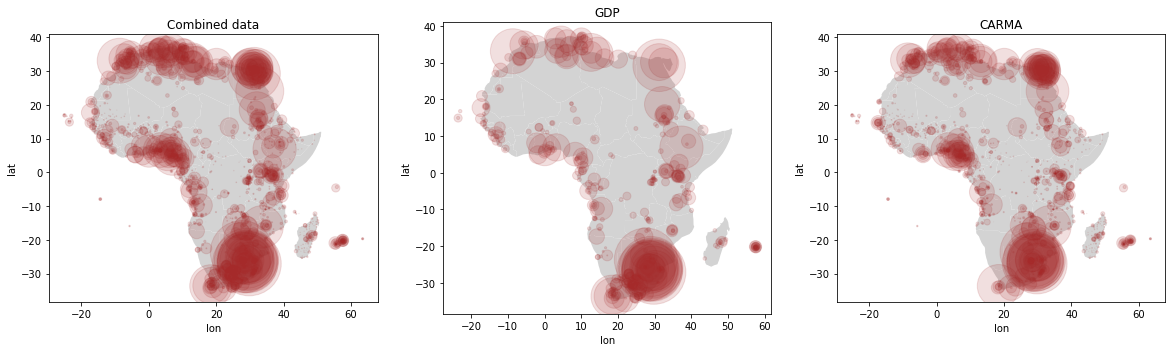

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
for ax in axs:
    countries[countries["continent"] == "Africa"].plot(color="lightgrey", ax=ax)
    
pm.powerplants().plot(x="lon", y="lat", kind="scatter", 
                      s="Capacity", c="brown", alpha=0.15,
                      title="Combined data", ax=axs[0])

pm.data.GPD().plot(x="lon", y="lat", kind="scatter", 
                   s="Capacity", c="brown", alpha=0.15,
                   title="GDP", ax=axs[1])

pm.data.CARMA().plot(x="lon", y="lat", kind="scatter", 
                   s="Capacity", c="brown", alpha=0.15,
                   title="CARMA", ax=axs[2])